In [1]:
import pandas as pd
import numpy as np
import glob
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import xgboost as xgb 
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
#使用したライブラリは以上

# パスで指定したファイルの一覧をリスト形式で取得. （ここでは一階層下のtestファイル以下）
csv_files = glob.glob('./train/train/*.csv')

In [2]:


#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file))

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list, axis=0)
df1 = df

C:\Users\shosh\AppData\Local\Temp\ipykernel_27592\1329878912.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file))
C:\Users\shosh\AppData\Local\Temp\ipykernel_27592\1329878912.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file))
C:\Users\shosh\AppData\Local\Temp\ipykernel_27592\1329878912.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_list.append(pd.read_csv(file))


In [10]:
df1

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1071589,中古マンション等,NaN,1107,北海道,札幌市西区,山の手５条,琴似(札幌市営),NaN,２ＬＤＫ,50,NaN,NaN,NaN,1977年,ＲＣ,住宅,NaN,NaN,NaN,NaN,近隣商業,80.0,200.0,2006年第4四半期,改装済み,NaN,6.698970
1,1016963,中古マンション等,NaN,1102,北海道,札幌市北区,北２４条西,北２４条,4,１ＤＫ,20,NaN,NaN,NaN,1973年,ＳＲＣ,住宅,住宅,NaN,NaN,NaN,商業,80.0,400.0,2017年第4四半期,改装済み,NaN,6.301030
2,1058309,中古マンション等,NaN,1106,北海道,札幌市南区,川沿１条,真駒内,30分～60分,３ＬＤＫ,145,NaN,NaN,NaN,1987年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,１中住専,60.0,200.0,2009年第2四半期,未改装,NaN,7.000000
3,1002325,中古マンション等,NaN,1101,北海道,札幌市中央区,北４条西,西１８丁目,11,４ＬＤＫ,95,NaN,NaN,NaN,2005年,ＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2011年第1四半期,未改装,NaN,7.462398
4,1046269,中古マンション等,NaN,1105,北海道,札幌市豊平区,月寒東１条,福住,5,３ＬＤＫ,70,NaN,NaN,NaN,1995年,ＲＣ,NaN,住宅,NaN,NaN,NaN,１種住居,60.0,200.0,2023年第1四半期,未改装,NaN,7.041393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,47002797,中古マンション等,NaN,47201,沖縄県,那覇市,首里平良町,儀保,8,２ＬＤＫ,50,NaN,NaN,NaN,1986年,ＲＣ,住宅,NaN,NaN,NaN,NaN,２種住居,60.0,200.0,2011年第2四半期,未改装,調停・競売等,6.653213
2431,47005124,中古マンション等,NaN,47201,沖縄県,那覇市,字安里,安里,5,３ＬＤＫ,65,NaN,NaN,NaN,2001年,ＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2008年第2四半期,未改装,NaN,7.146128
2432,47001864,中古マンション等,NaN,47201,沖縄県,那覇市,安里,牧志,3,４ＬＤＫ,230,NaN,NaN,NaN,1981年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2010年第2四半期,改装済み,NaN,7.397940
2433,47002156,中古マンション等,NaN,47201,沖縄県,那覇市,牧志,牧志,NaN,３ＬＤＫ,90,NaN,NaN,NaN,2010年,ＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2010年第4四半期,NaN,NaN,7.544068


In [11]:
df[['種類','土地の形状','間口','延床面積（㎡）','前面道路：方位','前面道路：種類','前面道路：幅員（ｍ）','地域']].drop_duplicates()

,種類,土地の形状,間口,延床面積（㎡）,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,地域
0,中古マンション等,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_geo=pd.read_csv('FEI_CITY_241203185618_3.csv',encoding='shift-jis')
df_safe = pd.read_csv('safety.csv',encoding='shift-jis')

In [13]:
df_safe

,調査年 コード,調査年,地域 コード,地域,/項目,K3101_交通事故発生件数【件】,K4201_刑法犯認知件数【件】
0,2009100000,2009年度,1100,北海道 札幌市,NaN,"8,516",***
1,2009100000,2009年度,1101,北海道 札幌市 中央区,NaN,"1,588",***
2,2009100000,2009年度,1102,北海道 札幌市 北区,NaN,"1,141",***
3,2009100000,2009年度,1103,北海道 札幌市 東区,NaN,"1,251",***
4,2009100000,2009年度,1104,北海道 札幌市 白石区,NaN,"1,086",***
...,...,...,...,...,...,...,...
57390,1980100000,1980年度,47361,沖縄県 久米島町,NaN,1,9
57391,1980100000,1980年度,47362,沖縄県 八重瀬町,NaN,21,137
57392,1980100000,1980年度,47375,沖縄県 多良間村,NaN,1,2
57393,1980100000,1980年度,47381,沖縄県 竹富町,NaN,1,10


In [14]:
df_geo=df_geo[df_geo['調査年']=='2020年度']
df_safe=df_safe[df_safe['調査年']=='2009年度']


In [15]:

# '地域' 列をスペースで3つに分割し、それぞれ新しい列に格納
df_geo[['地域1', '地域2', '地域3']] = df_geo['地域'].str.split(' ', n=2, expand=True)
df_safe[['地域1', '地域2', '地域3']] = df_safe['地域'].str.split(' ', n=2, expand=True)

df_geo


C:\Users\shosh\AppData\Local\Temp\ipykernel_10568\3573034715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe[['地域1', '地域2', '地域3']] = df_safe['地域'].str.split(' ', n=2, expand=True)
C:\Users\shosh\AppData\Local\Temp\ipykernel_10568\3573034715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe[['地域1', '地域2', '地域3']] = df_safe['地域'].str.split(' ', n=2, expand=True)
C:\Users\shosh\AppData\Local\Temp\ipykernel_10568\3573034715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

,調査年 コード,調査年,地域 コード,地域,/項目,A1101_総人口【人】,注釈,A1102_日本人人口【人】,注釈.1,A110201_日本人人口（男）【人】,注釈.2,地域1,地域2,地域3
0,2020100000,2020年度,1100,北海道 札幌市,NaN,"1,973,395",NaN,"1,933,094",NaN,"897,727",NaN,北海道,札幌市,None
1,2020100000,2020年度,1101,北海道 札幌市 中央区,NaN,"248,680",NaN,"238,156",NaN,"107,118",NaN,北海道,札幌市,中央区
2,2020100000,2020年度,1102,北海道 札幌市 北区,NaN,"289,323",NaN,"282,182",NaN,"133,472",NaN,北海道,札幌市,北区
3,2020100000,2020年度,1103,北海道 札幌市 東区,NaN,"265,379",NaN,"257,346",NaN,"121,398",NaN,北海道,札幌市,東区
4,2020100000,2020年度,1104,北海道 札幌市 白石区,NaN,"211,835",NaN,"210,298",NaN,"99,306",NaN,北海道,札幌市,白石区
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,2020100000,2020年度,47361,沖縄県 久米島町,NaN,"7,192",NaN,"7,152",NaN,"3,802",NaN,沖縄県,久米島町,None
1912,2020100000,2020年度,47362,沖縄県 八重瀬町,NaN,"30,941",NaN,"30,805",NaN,"15,148",NaN,沖縄県,八重瀬町,None
1913,2020100000,2020年度,47375,沖縄県 多良間村,NaN,"1,058",NaN,"1,047",NaN,574,NaN,沖縄県,多良間村,None
1914,2020100000,2020年度,47381,沖縄県 竹富町,NaN,"3,942",NaN,"3,898",NaN,"2,013",NaN,沖縄県,竹富町,None


In [16]:
df_geo=df_geo.rename({'地域1': '都道府県名'}, axis=1)

df_safe=df_safe.rename({'地域1': '都道府県名'}, axis=1)

# '市区町村名' を作成。'地域3' が空白の場合に '地域2' を代入
df_geo['市区町村名'] = df_geo.apply(lambda row: row['地域2'] if pd.isna(row['地域3']) or row['地域3'] == '' else row['地域2'] + row['地域3'], axis=1)
df_safe['市区町村名'] = df_safe.apply(lambda row: row['地域2'] if pd.isna(row['地域3']) or row['地域3'] == '' else row['地域2'] + row['地域3'], axis=1)

In [17]:
df_geo=df_geo[['都道府県名','市区町村名','A1101_総人口【人】', 
       'A1102_日本人人口【人】',  'A110201_日本人人口（男）【人】'
       ]]
df_geo

,都道府県名,市区町村名,A1101_総人口【人】,A1102_日本人人口【人】,A110201_日本人人口（男）【人】
0,北海道,札幌市,"1,973,395","1,933,094","897,727"
1,北海道,札幌市中央区,"248,680","238,156","107,118"
2,北海道,札幌市北区,"289,323","282,182","133,472"
3,北海道,札幌市東区,"265,379","257,346","121,398"
4,北海道,札幌市白石区,"211,835","210,298","99,306"
...,...,...,...,...,...
1911,沖縄県,久米島町,"7,192","7,152","3,802"
1912,沖縄県,八重瀬町,"30,941","30,805","15,148"
1913,沖縄県,多良間村,"1,058","1,047",574
1914,沖縄県,竹富町,"3,942","3,898","2,013"


In [18]:
df_safe=df_safe[['都道府県名','市区町村名','K3101_交通事故発生件数【件】',
       'K4201_刑法犯認知件数【件】']]

In [12]:
df_safe.columns

Index(['都道府県名', '市区町村名', 'K3101_交通事故発生件数【件】', 'K4201_刑法犯認知件数【件】'], dtype='object')

In [19]:
import re
# 数字カラムを float に変換
population_columns = ['A1101_総人口【人】', 
                      'A1102_日本人人口【人】', 'A110201_日本人人口（男）【人】'
                      ]

for col in population_columns:
    df_geo[col] = df_geo[col].apply(lambda x: float(re.sub(',', '', x)))

# 必要なカラムのみを選択
df_geo = df_geo[['都道府県名', '市区町村名', 'A1101_総人口【人】',
                  'A1102_日本人人口【人】', 'A110201_日本人人口（男）【人】'
                ]]




In [20]:
population_columnssafe = ['K3101_交通事故発生件数【件】',
       'K4201_刑法犯認知件数【件】'
                      ]

for col in population_columnssafe:
    df_safe[col] = df_safe[col].apply(lambda x: float(re.sub(',', '', x)) if re.sub(',', '', x).replace('.', '', 1).isdigit() else None)

# 必要なカラムのみを選択
df_safe = df_safe[['都道府県名', '市区町村名', 'K3101_交通事故発生件数【件】',
       'K4201_刑法犯認知件数【件】'
                ]]


In [44]:
df

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1071589,中古マンション等,NaN,1107,北海道,札幌市西区,山の手５条,琴似(札幌市営),NaN,２ＬＤＫ,50,NaN,NaN,NaN,1977年,ＲＣ,住宅,NaN,NaN,NaN,NaN,近隣商業,80.0,200.0,2006年第4四半期,改装済み,NaN,6.698970
1,1016963,中古マンション等,NaN,1102,北海道,札幌市北区,北２４条西,北２４条,4,１ＤＫ,20,NaN,NaN,NaN,1973年,ＳＲＣ,住宅,住宅,NaN,NaN,NaN,商業,80.0,400.0,2017年第4四半期,改装済み,NaN,6.301030
2,1058309,中古マンション等,NaN,1106,北海道,札幌市南区,川沿１条,真駒内,30分～60分,３ＬＤＫ,145,NaN,NaN,NaN,1987年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,１中住専,60.0,200.0,2009年第2四半期,未改装,NaN,7.000000
3,1002325,中古マンション等,NaN,1101,北海道,札幌市中央区,北４条西,西１８丁目,11,４ＬＤＫ,95,NaN,NaN,NaN,2005年,ＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2011年第1四半期,未改装,NaN,7.462398
4,1046269,中古マンション等,NaN,1105,北海道,札幌市豊平区,月寒東１条,福住,5,３ＬＤＫ,70,NaN,NaN,NaN,1995年,ＲＣ,NaN,住宅,NaN,NaN,NaN,１種住居,60.0,200.0,2023年第1四半期,未改装,NaN,7.041393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,47002797,中古マンション等,NaN,47201,沖縄県,那覇市,首里平良町,儀保,8,２ＬＤＫ,50,NaN,NaN,NaN,1986年,ＲＣ,住宅,NaN,NaN,NaN,NaN,２種住居,60.0,200.0,2011年第2四半期,未改装,調停・競売等,6.653213
2431,47005124,中古マンション等,NaN,47201,沖縄県,那覇市,字安里,安里,5,３ＬＤＫ,65,NaN,NaN,NaN,2001年,ＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2008年第2四半期,未改装,NaN,7.146128
2432,47001864,中古マンション等,NaN,47201,沖縄県,那覇市,安里,牧志,3,４ＬＤＫ,230,NaN,NaN,NaN,1981年,ＳＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2010年第2四半期,改装済み,NaN,7.397940
2433,47002156,中古マンション等,NaN,47201,沖縄県,那覇市,牧志,牧志,NaN,３ＬＤＫ,90,NaN,NaN,NaN,2010年,ＲＣ,住宅,NaN,NaN,NaN,NaN,商業,80.0,400.0,2010年第4四半期,NaN,NaN,7.544068


In [21]:
df = pd.merge(df,df_geo,on = ['都道府県名','市区町村名'],how='left')
df = pd.merge(df,df_safe,on = ['都道府県名','市区町村名'],how='left')

In [77]:
df_geo

,都道府県名,市区町村名,A1101_総人口【人】,A1102_日本人人口【人】,A110201_日本人人口（男）【人】
0,北海道,札幌市,"1,973,395","1,933,094","897,727"
1,北海道,札幌市中央区,"248,680","238,156","107,118"
2,北海道,札幌市北区,"289,323","282,182","133,472"
3,北海道,札幌市東区,"265,379","257,346","121,398"
4,北海道,札幌市白石区,"211,835","210,298","99,306"
...,...,...,...,...,...
1911,沖縄県,久米島町,"7,192","7,152","3,802"
1912,沖縄県,八重瀬町,"30,941","30,805","15,148"
1913,沖縄県,多良間村,"1,058","1,047",574
1914,沖縄県,竹富町,"3,942","3,898","2,013"


In [ ]:


# 表示する最大列数を設定
pd.set_option('display.max_columns', 50)



quarter_conversion = {
    '年第1四半期': '.25',
    '年第2四半期': '.50',
    '年第3四半期': '.75',
    '年第4四半期': '.99'
}
def convert_to_float(date_str):
    for key, value in quarter_conversion.items():
        if key in date_str:
            year = date_str.replace(key, '')
            return float(year + value)
    return None





def data_pre(df):
    nonnull_list = []
    for col in df.columns:
        nonnull = df[col].count()
    if nonnull == 0:
        nonnull_list.append(col)

    df = df.drop(nonnull_list, axis=1)
    if 'ID' in df.columns:
        df = df.drop('ID', axis = 1)



    dis = {
      '30分～60分':30,
      '1H～1H30':60,
      '2H～':120,
      '1H30～2H':90
    }
    df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(dis).astype(float)

    df['面積（㎡）'] = df['面積（㎡）'].replace('2,000㎡以上',2000).astype(float)


    df['建築年'] = df['建築年'].apply(lambda x: 1945 if x == "戦前" else (int(x[:-1]) if isinstance(x, str) else np.nan))
    # df = df.drop(columns=['建築年'])


    df['取引時点'] = df['取引時点'].apply(convert_to_float)
    
    df['面積ー築年数']= df["面積（㎡）"] - df['建築年']
    df['建築年ー取引時点']= df["建築年"] - df['取引時点']#有効かも
    # df['面積ー取引時点']= df["面積（㎡）"] - df['取引時点'] #ないほうがいい
    
    for col in ["都道府県名", "地区名","市区町村名","種類", "最寄駅：名称", "間取り", "建物の構造", "用途", "今後の利用目的", "都市計画", "改装", "取引の事情等"]:
                df[col] = df[col].astype("category")
    
    # df = df.drop(columns=['土地の形状','間口','延床面積（㎡）'])
    df = df.drop(columns=[
    #      '用途',
    #  '都市計画',
    # '地域',
    '建物の構造',
    '建ぺい率（％）',
    '種類',
    '土地の形状',
    '間口',
    '延床面積（㎡）',
    '前面道路：方位',
    '前面道路：種類',
    '前面道路：幅員（ｍ）'])

    return df

df = data_pre(df)

In [5]:
df.columns

Index(['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', '取引価格（総額）_log'],
      dtype='object')

In [12]:
df_train,df_val = train_test_split(df,test_size=0.1, random_state=420)

col = '取引価格（総額）_log'
train_y = df_train[col]
train_x = df_train.drop(col,axis=1)

val_y = df_val[col]
val_x = df_val.drop(col,axis=1)

trains = lgb.Dataset(train_x,train_y)
valids = lgb.Dataset(val_x,val_y)
params = {
    'objective': 'regression',
    'metric': 'mae',
    # 'boosting_type': 'gbdt',
    # 'learning_rate': 0.01,
    # 'num_leaves': 200,
    # 'max_depth': 20,
    # 'min_data_in_leaf': 20,
    # 'feature_fraction': 0.9,
    # 'bagging_fraction': 0.8,
    # 'bagging_freq': 5,
    # 'lambda_l1': 0.1,
    # 'lambda_l2': 0.1,
    # 'min_split_gain': 0.01,
    # 'n_jobs': -1,
    # 'verbosity': -1,
   
  
    # 'max_bin': 25 ,
    #  'bin_construct_sample_cnt': 200000# max_binの値を255以下に設定
}




model = lgb.train(params, trains, valid_sets=valids,
                   num_boost_round=3000,
                   callbacks=[lgb.early_stopping(stopping_rounds=100)])


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1783]	valid_0's l1: 0.0743668


In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Splitting the data
df_train, df_val = train_test_split(df, test_size=0.1, random_state=420)

col = '取引価格（総額）_log'
train_y = df_train[col]
train_x = df_train.drop(col, axis=1)

val_y = df_val[col]
val_x = df_val.drop(col, axis=1)

# Creating DMatrix for XGBoost
trains = xgb.DMatrix(train_x, label=train_y, enable_categorical=True)
valids = xgb.DMatrix(val_x, label=val_y, enable_categorical=True)

params = {
    'objective': 'reg:squarederror',  # Use 'reg:squarederror' instead of 'reg:linear'
    'eval_metric': 'mae',
    # 'learning_rate': 0.01,
    # 'max_depth': 20,
    # 'min_child_weight': 1,
    # 'subsample': 0.8,
    # 'colsample_bytree': 0.9,
    # 'lambda': 0.1,
    # 'alpha': 0.1,
    # 'n_jobs': -1,
    # 'verbosity': 1,
}

watchlist = [(trains, 'train'), (valids, 'eval')]

model = xgb.train(params, trains, num_boost_round=3000, evals=watchlist, early_stopping_rounds=100)


[0]	train-mae:0.21643	eval-mae:0.21662
[1]	train-mae:0.17808	eval-mae:0.17826
[2]	train-mae:0.15286	eval-mae:0.15304
[3]	train-mae:0.13508	eval-mae:0.13535
[4]	train-mae:0.12297	eval-mae:0.12339
[5]	train-mae:0.11488	eval-mae:0.11540
[6]	train-mae:0.10903	eval-mae:0.10972
[7]	train-mae:0.10400	eval-mae:0.10484
[8]	train-mae:0.10093	eval-mae:0.10196
[9]	train-mae:0.09775	eval-mae:0.09899
[10]	train-mae:0.09566	eval-mae:0.09715
[11]	train-mae:0.09380	eval-mae:0.09551
[12]	train-mae:0.09214	eval-mae:0.09405
[13]	train-mae:0.09111	eval-mae:0.09317
[14]	train-mae:0.09015	eval-mae:0.09240
[15]	train-mae:0.08920	eval-mae:0.09155
[16]	train-mae:0.08839	eval-mae:0.09088
[17]	train-mae:0.08740	eval-mae:0.09008
[18]	train-mae:0.08683	eval-mae:0.08965
[19]	train-mae:0.08621	eval-mae:0.08925
[20]	train-mae:0.08554	eval-mae:0.08870
[21]	train-mae:0.08473	eval-mae:0.08799
[22]	train-mae:0.08423	eval-mae:0.08759
[23]	train-mae:0.08396	eval-mae:0.08746
[24]	train-mae:0.08348	eval-mae:0.08707
[25]	train

In [18]:
import pandas as pd
import xgboost as xgb

# Load and preprocess the test data
df_test = pd.read_csv("./test.csv", index_col=0)
df_test = data_pre(df_test)

# Create DMatrix for the test data
dtest = xgb.DMatrix(df_test, enable_categorical=True)

# Make predictions
predict = model.predict(dtest)
df_test["取引価格（総額）_log"] = predict

# Save the results
# df_test['ID'] = dfid
# df_test[['ID', "取引価格（総額）_log"]].to_csv("submit_test.csv")

df_test[["取引価格（総額）_log"]].to_csv("submit_test.csv")



In [16]:
df_test = pd.read_csv("./test.csv", index_col=0)
df_test = data_pre(df_test)
predict = model.predict(df_test)
df_test["取引価格（総額）_log"] = predict
# df_test['ID']=dfid
# df_test[['ID',"取引価格（総額）_log"]].to_csv("submit_test.csv")

df_test[["取引価格（総額）_log"]].to_csv("submit_test.csv")

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: Us

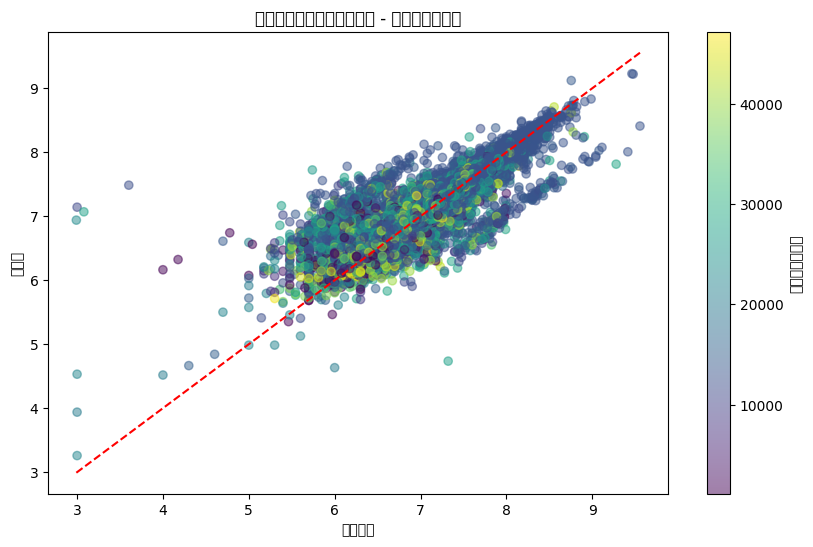

7
7
7
7


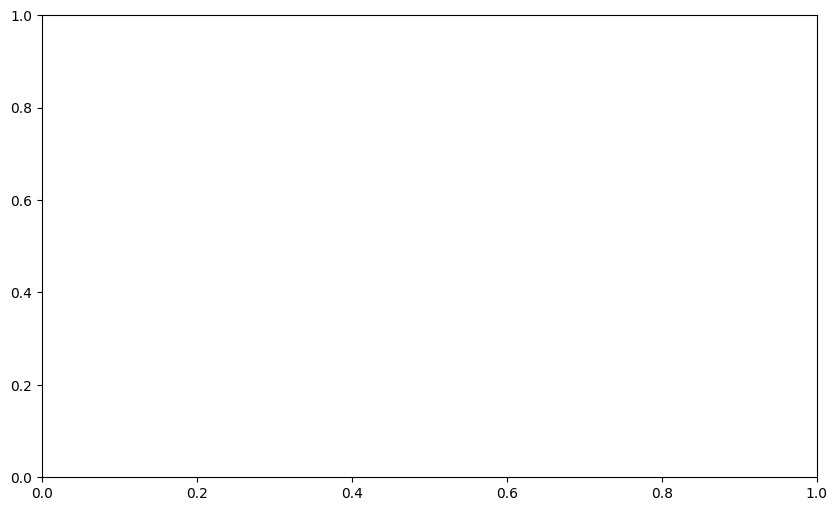

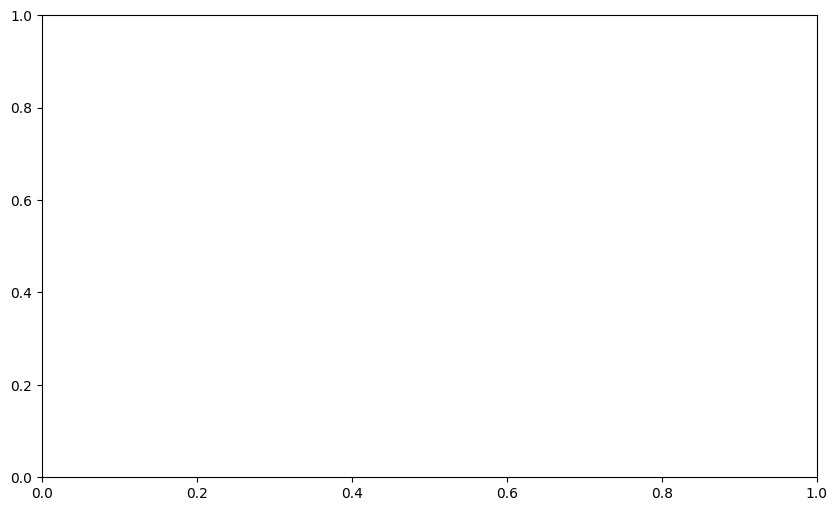

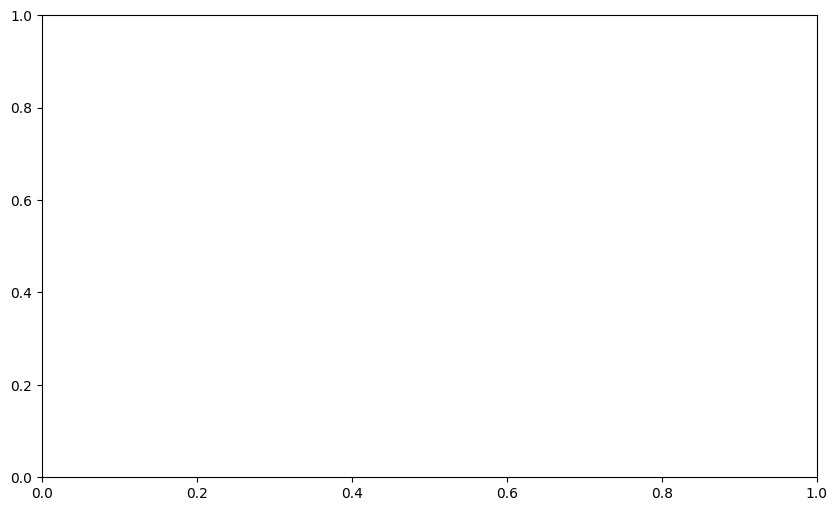

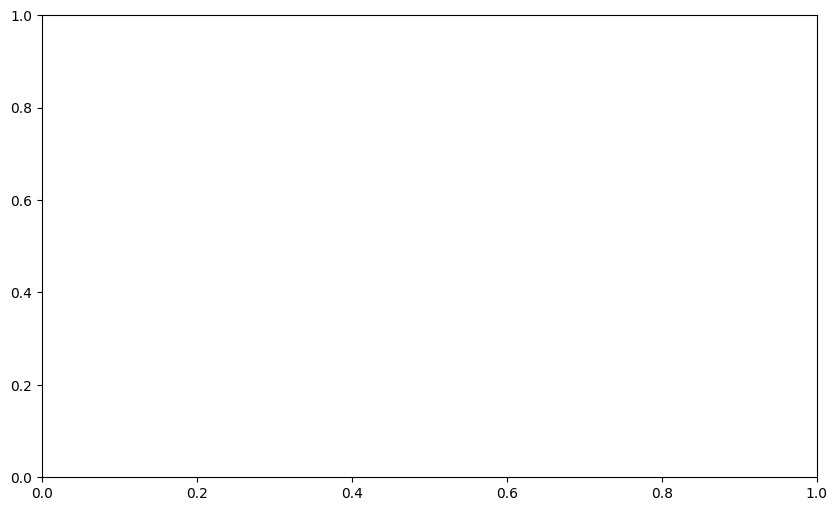

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39365 (\N{CJK UNIFIED IDEOGRAPH-99C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserW

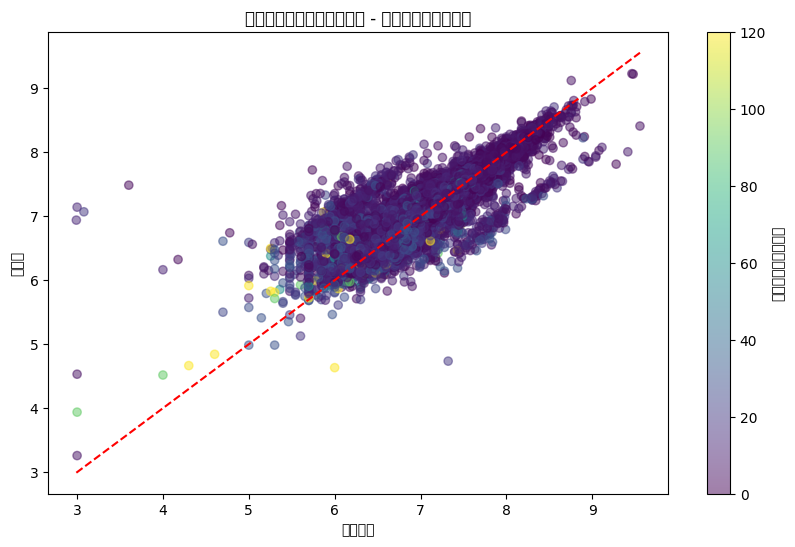

7


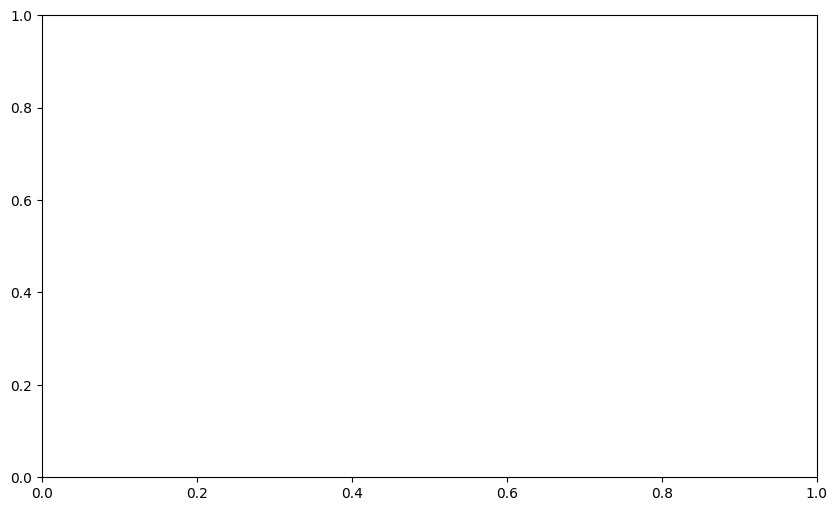

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


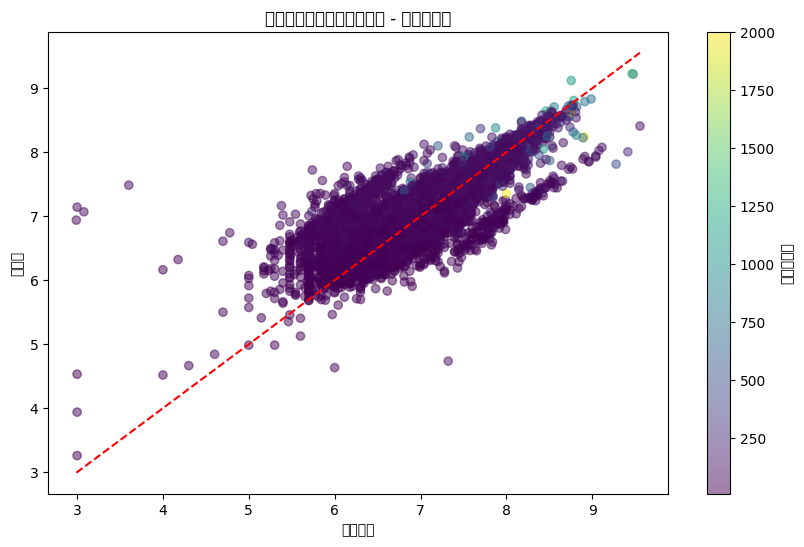

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31689 (\N{CJK UNIFIED IDEOGRAPH-7BC9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


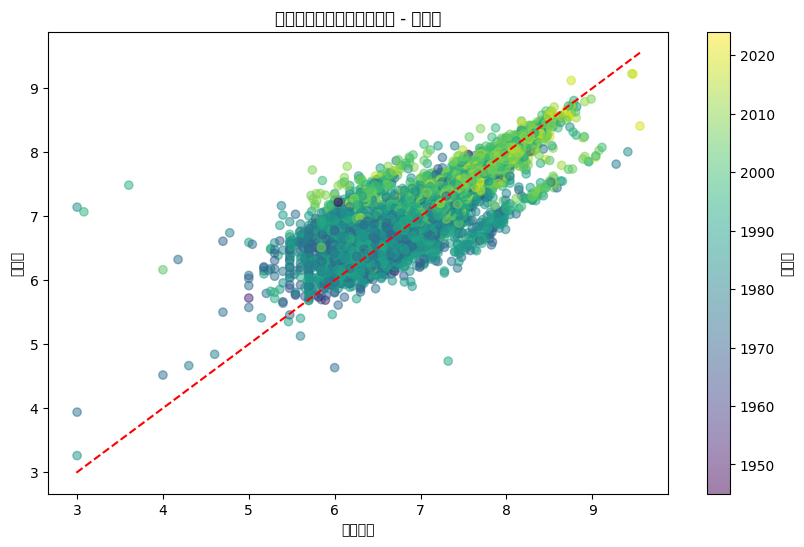

7
7
7


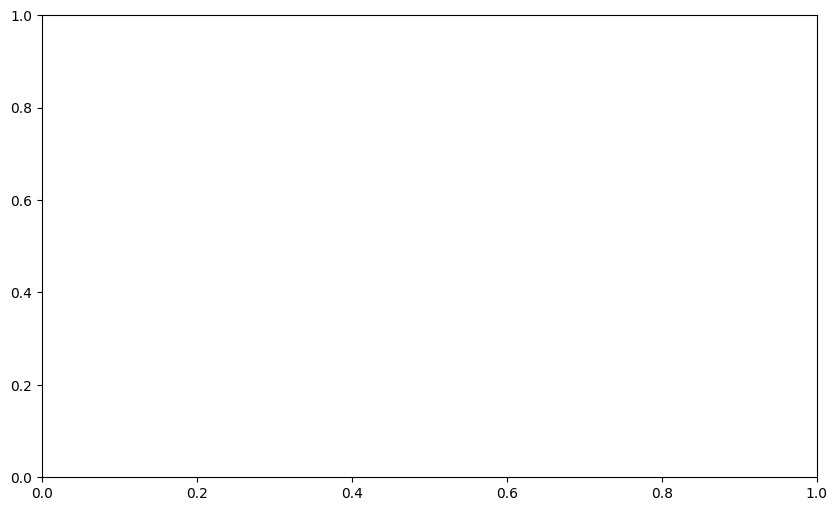

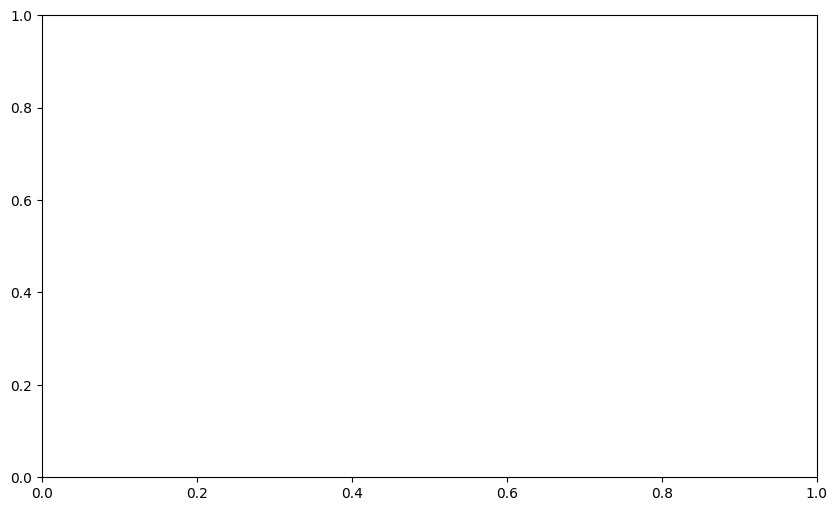

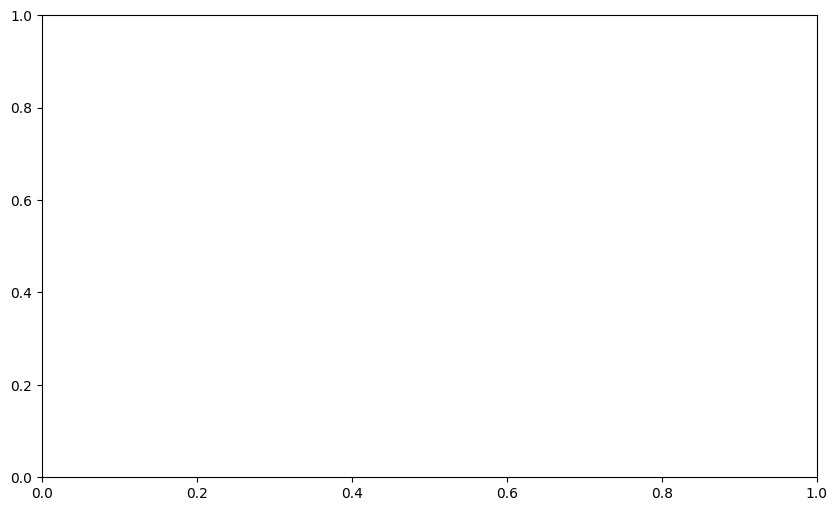

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


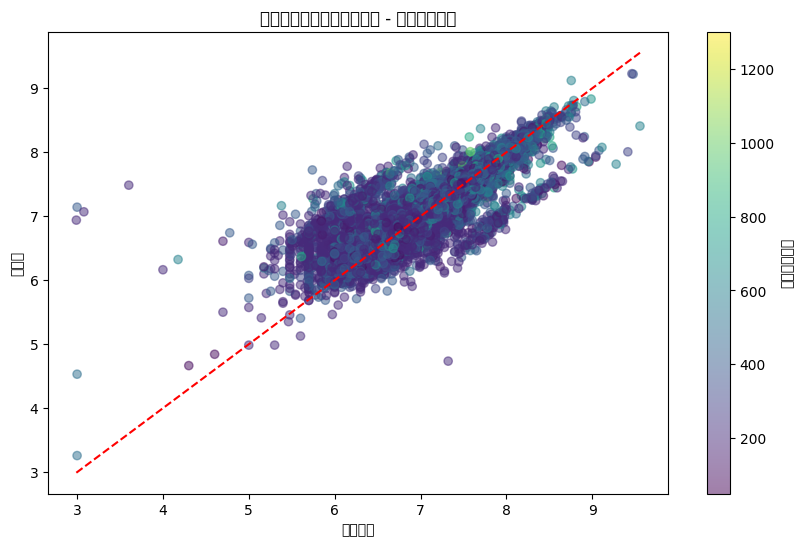

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21462 (\N{CJK UNIFIED IDEOGRAPH-53D6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


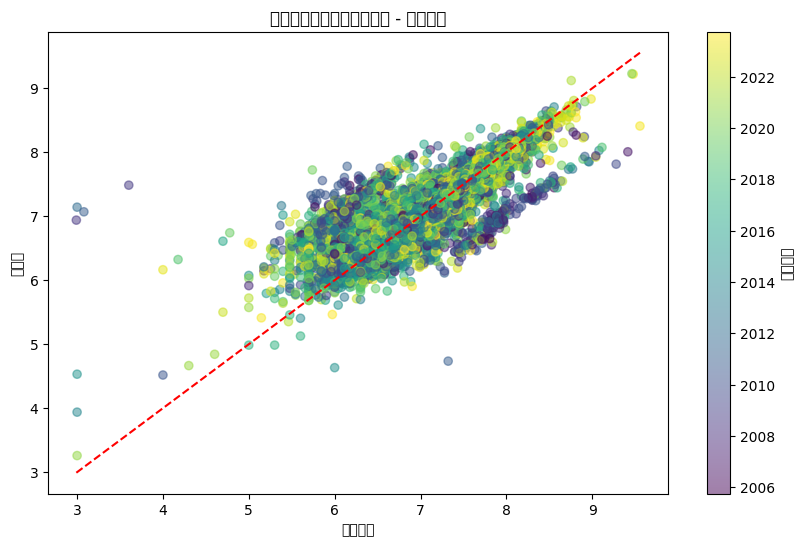

7
7


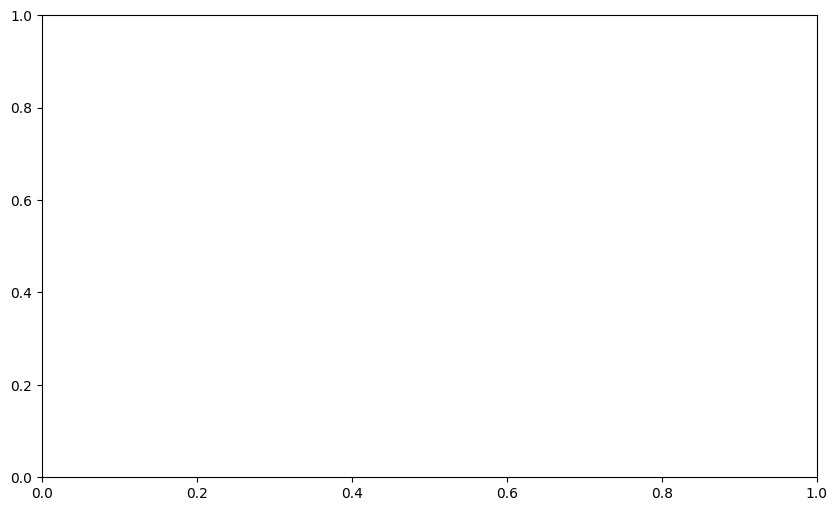

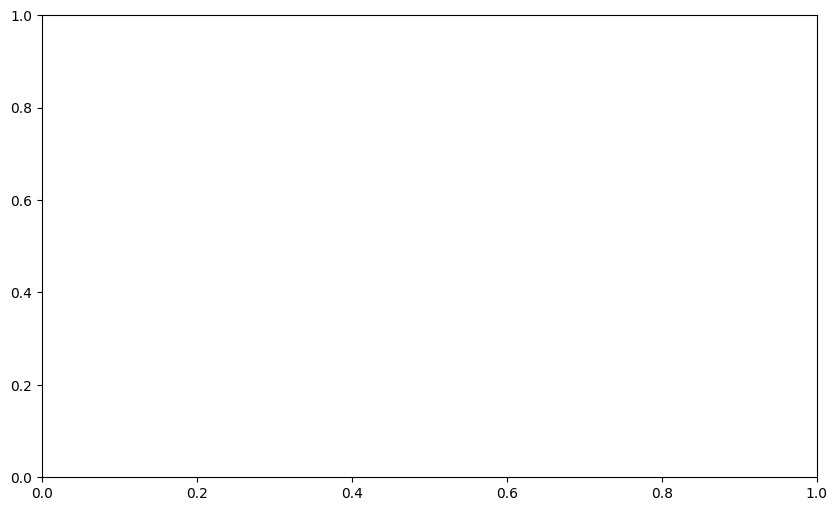

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32207 (\N{CJK UNIFIED IDEOGRAPH-7DCF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38989 (\N{CJK UNIFIED IDEOGRAPH-984D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


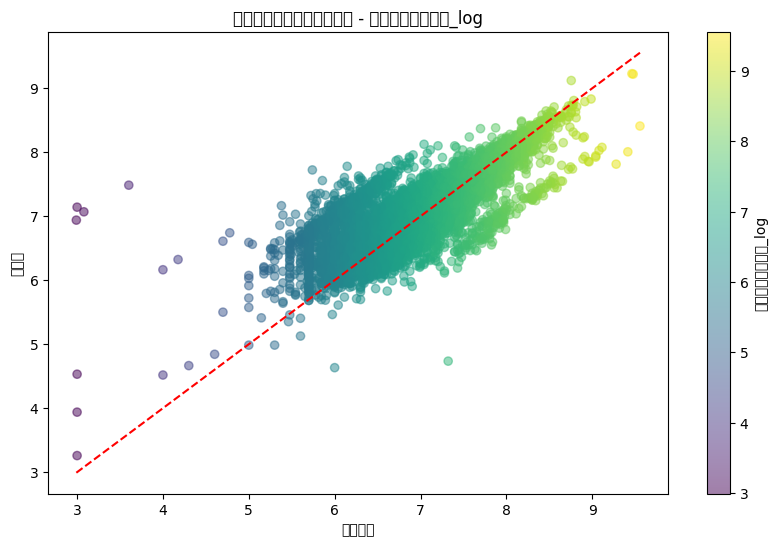

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


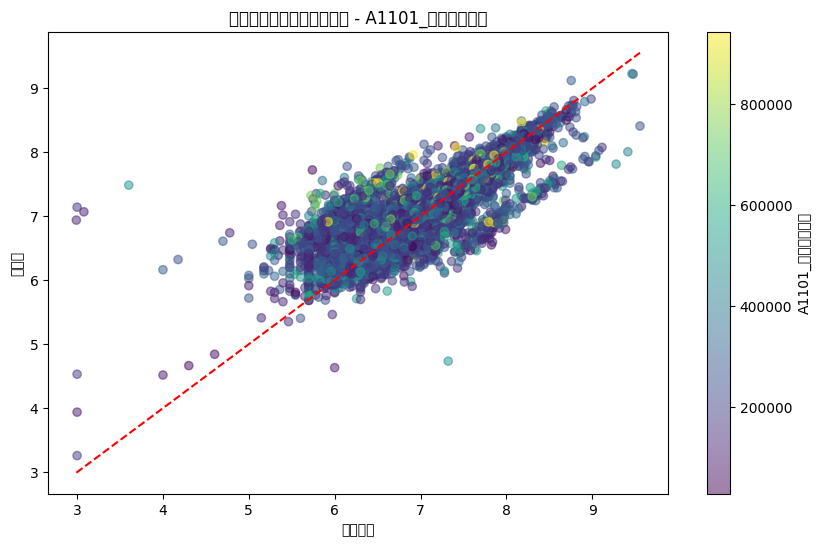

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


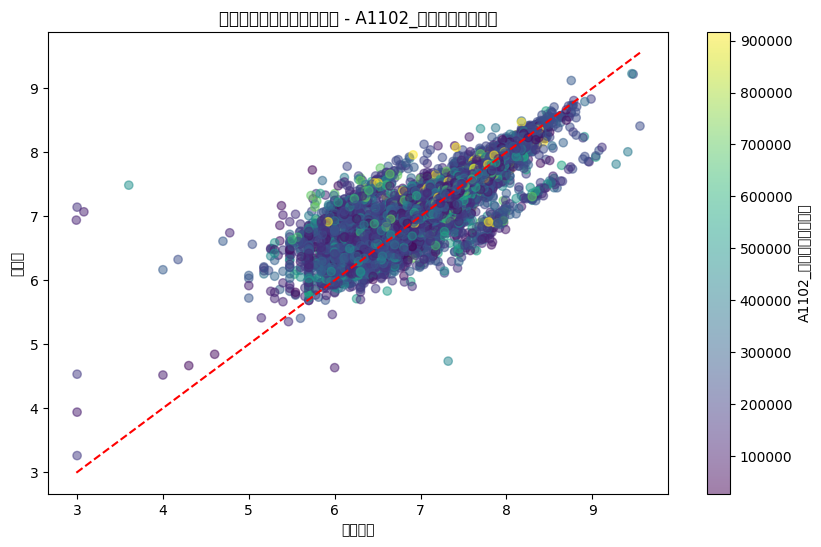

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


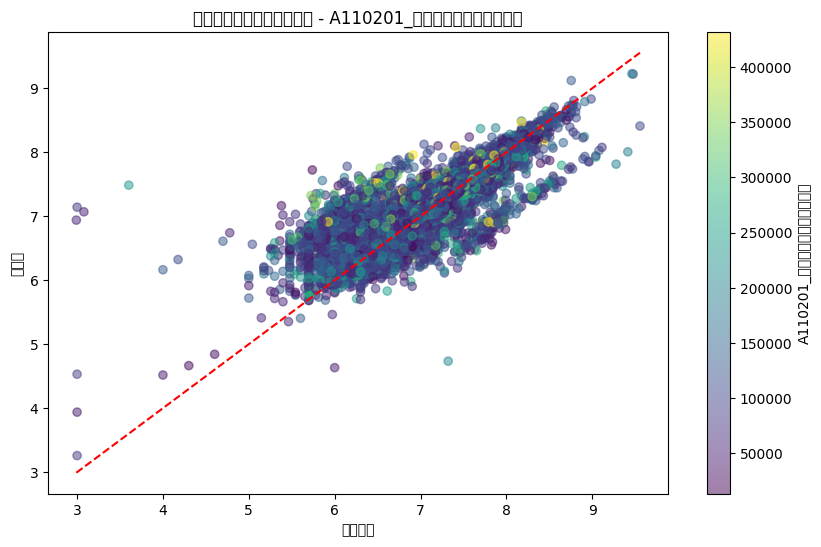

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20107 (\N{CJK UNIFIED IDEOGRAPH-4E8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25925 (\N{CJK UNIFIED IDEOGRAPH-6545}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py

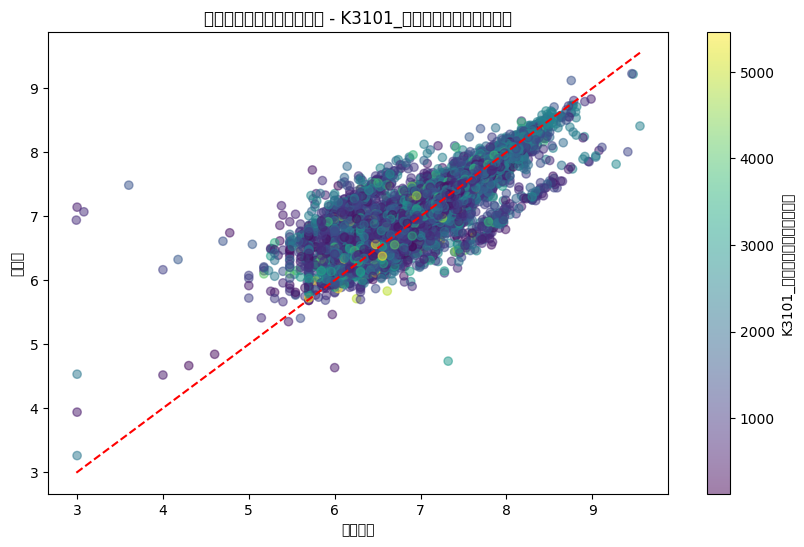

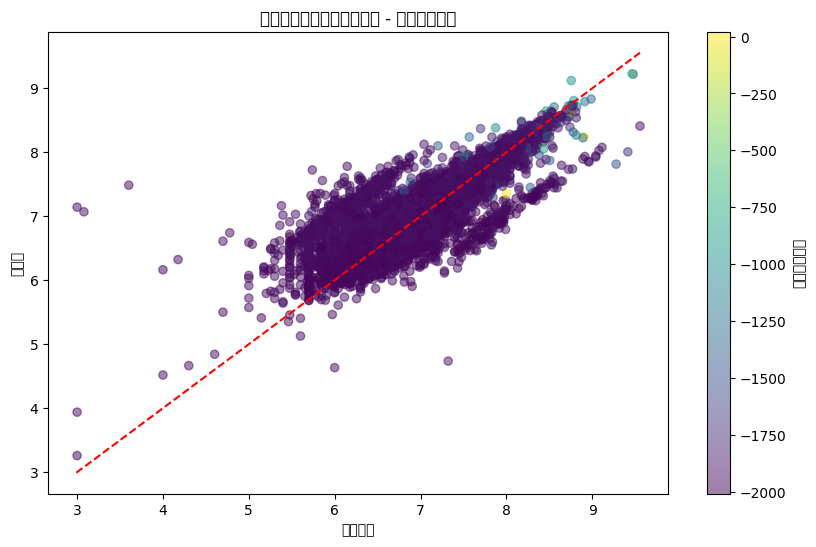

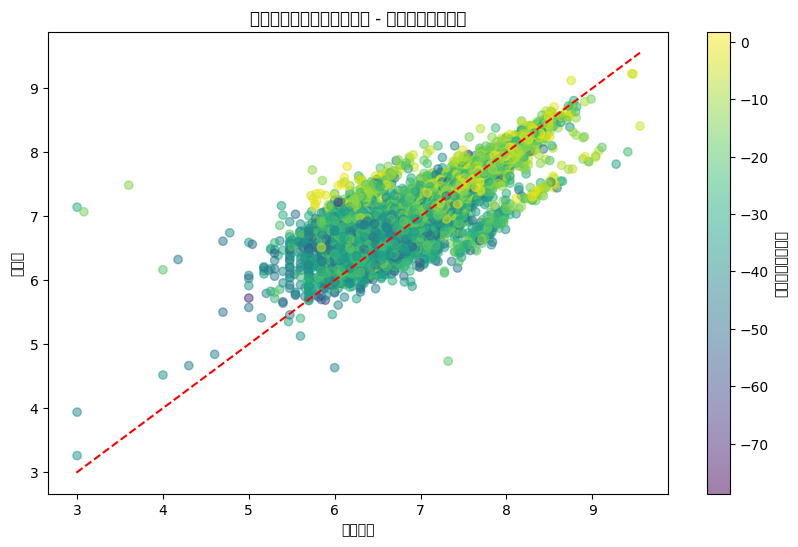

In [25]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

# # モデルのトレーニング
# model = lgb.train(params, trains, valid_sets=valids,
#                    num_boost_round=3000,
#                    callbacks=[lgb.early_stopping(stopping_rounds=100)])

# # 検証データでの予測
val_predictions = model.predict(val_x, num_iteration=model.best_iteration)

# 実際の値と予測値をデータフレームに格納
df_val["予測値"] = val_predictions
df_val["実際の値"] = val_y

# 各カラムごとに色分けして散布図を作成
for col in df_val.columns:
    if col not in ["予測値", "実際の値"]:
        try:
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(df_val["実際の値"], df_val["予測値"], c=df_val[col], cmap='viridis', alpha=0.5)
            plt.colorbar(scatter, label=col)
            plt.plot([df_val["実際の値"].min(), df_val["実際の値"].max()],
                    [df_val["実際の値"].min(), df_val["実際の値"].max()],
                    color='red', linestyle='--')
            plt.xlabel("実際の値")
            plt.ylabel("予測値")
            plt.title(f"予測値と実際の値の散布図 - {col}")
            plt.show()
        except:
            print(7)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_val["実際の値"], df_val["予測値"], alpha=0.5)
plt.plot([df_val["実際の値"].min(), df_val["実際の値"].max()],
         [df_val["実際の値"].min(), df_val["実際の値"].max()],
         color='red', linestyle='--')
plt.xlabel("実際の値")
plt.ylabel("予測値")
plt.title("予測値と実際の値の散布図")
plt.show()

,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,用途,今後の利用目的,都市計画,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log,面積ー築年数,建築年ー取引時点,予測値,実際の値
246617,13101,東京都,千代田区,二番町,麹町,2.0,１Ｋ,15.0,1972.0,住宅,NaN,２中住専,500.0,2006.50,未改装,NaN,6.919078,-1957.0,-34.50,6.887539,6.919078
44107,11203,埼玉県,川口市,芝新町,蕨,3.0,１Ｋ,20.0,2015.0,住宅,その他,商業,400.0,2015.99,未改装,NaN,7.301030,-1995.0,-0.99,7.341060,7.301030
25478,28101,兵庫県,神戸市東灘区,森北町,甲南山手,8.0,３ＬＤＫ,55.0,1997.0,住宅,NaN,２中住専,200.0,2018.99,未改装,NaN,7.278754,-1942.0,-21.99,7.349681,7.278754
5365,14117,神奈川県,横浜市青葉区,すすき野,あざみ野,30.0,４ＬＤＫ,80.0,1998.0,住宅,NaN,近隣商業,200.0,2013.50,未改装,NaN,7.380211,-1918.0,-15.50,7.504797,7.380211
76845,27203,大阪府,豊中市,東寺内町,緑地公園,4.0,３ＬＤＫ,75.0,2012.0,住宅,住宅,１低住専,150.0,2015.75,未改装,NaN,7.643453,-1937.0,-3.75,7.654923,7.643453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31799,27127,大阪府,大阪市北区,中津,中津(大阪メトロ),7.0,１Ｋ,20.0,2014.0,住宅,住宅,準工業,300.0,2020.25,未改装,NaN,7.230449,-1994.0,-6.25,7.201935,7.230449
4184,25201,滋賀県,大津市,唐橋町,石山,11.0,３ＬＤＫ,65.0,2009.0,NaN,住宅,商業,400.0,2019.99,未改装,NaN,7.278754,-1944.0,-10.99,7.353505,7.278754
25530,12222,千葉県,我孫子市,我孫子,我孫子,7.0,NaN,75.0,2000.0,住宅,住宅,１種住居,200.0,2018.50,未改装,NaN,7.342423,-1925.0,-18.50,7.336937,7.342423
1605,37201,香川県,高松市,中新町,瓦町,20.0,１ＤＫ,25.0,1989.0,住宅,住宅,商業,400.0,2019.99,未改装,NaN,6.556303,-1964.0,-30.99,6.372723,6.556303


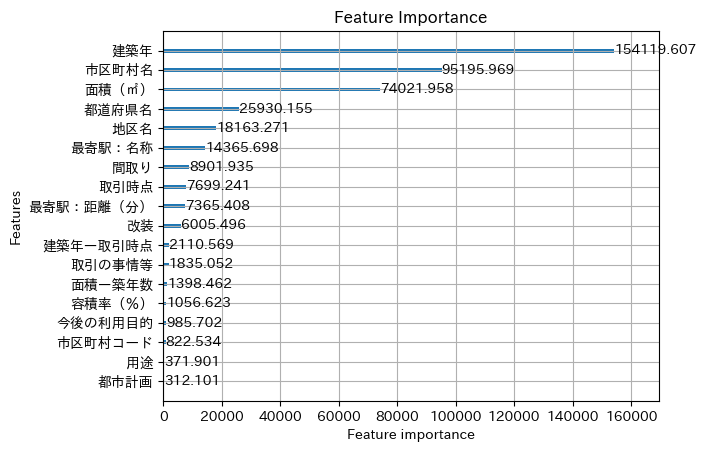

In [8]:
import matplotlib.pyplot as plt
import japanize_matplotlib

lgb.plot_importance(model, max_num_features=25, importance_type='gain')
plt.title('Feature Importance')
plt.show()

C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31689 (\N{CJK UNIFIED IDEOGRAPH-7BC9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shosh\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py

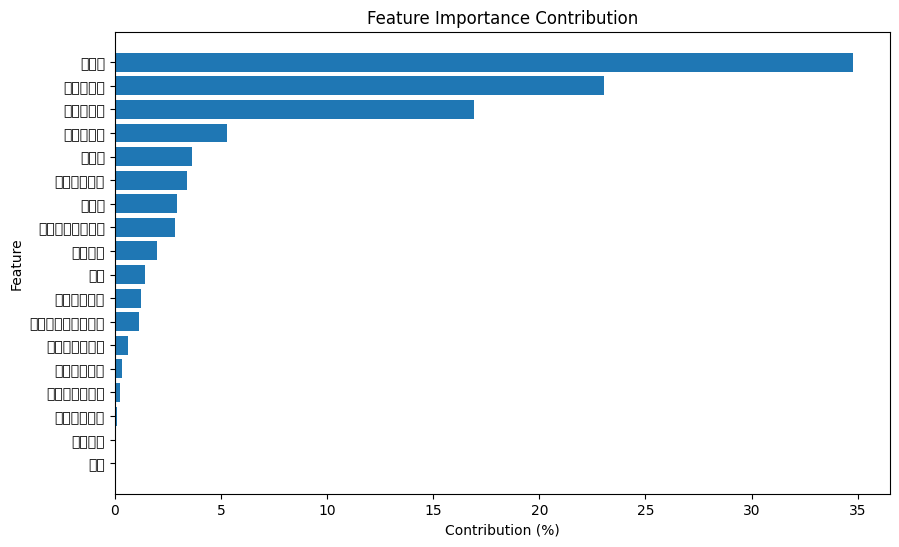

In [8]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd

#
importance = model.feature_importance(importance_type='gain')
feature_names = model.feature_name()

# 寄与率を計算
importance_sum = sum(importance)
contribution = [(i / importance_sum) * 100 for i in importance]

# データフレームに変換
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance, 'Contribution (%)': contribution})

# 寄与率でソート
importance_df = importance_df.sort_values(by='Contribution (%)', ascending=False)

# グラフをプロット
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Contribution (%)'])
plt.xlabel('Contribution (%)')
plt.ylabel('Feature')
plt.title('Feature Importance Contribution')
plt.gca().invert_yaxis()
plt.show()


In [67]:
# df_test = pd.read_csv("./test.csv")
df_test = pd.read_csv("./test.csv")
dfid=df_test[['ID']]

In [68]:
df_test =pd.merge(df_test,df_geo,on = ['都道府県名','市区町村名'],how='left')


In [69]:
# df_test = pd.read_csv("./test.csv", index_col=0)
df_test = data_pre(df_test)
predict = model.predict(df_test)
df_test["取引価格（総額）_log"] = predict
df_test['ID']=dfid
df_test[['ID',"取引価格（総額）_log"]].to_csv("submit_test.csv")

In [52]:
df_test[['ID',"取引価格（総額）_log"]]

,ID,取引価格（総額）_log
0,1000101,7.468106
1,1000102,7.346042
2,1000103,6.593493
3,1000105,6.884508
4,1000106,6.537226
...,...,...
19385,47016501,7.096491
19386,47016502,6.911460
19387,47016792,7.087355
19388,47016793,7.108025


In [ ]:
# import lightgbm as lgb
import shap
# import matplotlib.pyplot as plt

# モデルのトレーニング
model = lgb.train(params, trains, valid_sets=valids,
                   num_boost_round=3000,
                   callbacks=[lgb.early_stopping(stopping_rounds=100)])

# SHAP値の計算
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)

# SHAPサマリープロット
shap.summary_plot(shap_values, train_x, plot_type="bar")
plt.title('SHAP Feature Importance')
plt.show()


c:\Users\shosh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12581
[LightGBM] [Info] Number of data points in the train set: 677751, number of used features: 18
[LightGBM] [Info] Start training from score 7.243652
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2419]	valid_0's l1: 0.0749331


In [11]:
pip install shap


[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 456.1/456.1 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 42.5 MB/s eta 0:00:00
     --------------------------------------- 28.1/28.1 MB 27.3 MB/s eta 0:00:00


In [ ]:
}